# Cell transfer across ST slides of multiple time points

In [1]:
# import sys
# sys.path.append('/Users/yzf/Desktop/spaTrack')
import sys
sys.path.append('/hwfssz1/ST_SUPERCELLS/P21Z10200N0134/USER/huangke2/27.spatial.trajectory/12.SpaTrack/03.code/spaTrack-main/spaTrack/')

In this tutorial, We use mouse midbrain ST data to demonstrate cell transfer across ST slides of multiple time points

In [2]:
#import spaTrack as spt
import anndata as ad

import warnings
#import spaTrack as spt
import more_time as spt
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
sc.settings.verbosity = 0
plt.rcParams['figure.dpi'] = 200 #分辨率
warnings.filterwarnings("ignore")

## Prepare ST data

Spatial transcriptmic data of mouse midbrain at E12.5,E14.5 and E16.5 time points were downloaded from published paper(Chen 2022). Example files can be download from [Google Drive](https://drive.google.com/drive/folders/1WaYnt2jWNbCDa65x5QcuI-c11Yw42a-0).We focused on progenitors cells including RGC(radial glia cells),NeuB(neuroblasts) and GlioB(glioblasts) to describe transfer relations among these progenitors cells.

In [4]:
adata1_sub=sc.read_h5ad('/hwfssz1/ST_SUPERCELLS/P21Z10200N0134/USER/huangke2/27.spatial.trajectory/12.SpaTrack/07.ICC.new/06.mouse.brain/E12.5.h5ad')
adata1_sub = adata1_sub[adata1_sub.obs['annotation'].isin(['RGC', 'NeuB', 'GlioB'])]

adata2_sub=sc.read_h5ad('/hwfssz1/ST_SUPERCELLS/P21Z10200N0134/USER/huangke2/27.spatial.trajectory/12.SpaTrack/07.ICC.new/06.mouse.brain/E14.5.h5ad')
adata2_sub = adata2_sub[adata2_sub.obs['annotation'].isin(['RGC', 'NeuB', 'GlioB'])]

adata3_sub=sc.read_h5ad('/hwfssz1/ST_SUPERCELLS/P21Z10200N0134/USER/huangke2/27.spatial.trajectory/12.SpaTrack/07.ICC.new/06.mouse.brain/E16.5.h5ad')
adata3_sub = adata3_sub[adata3_sub.obs['annotation'].isin(['RGC', 'NeuB', 'GlioB'])]

adatas = [adata1_sub, adata2_sub, adata3_sub]
adata_all = adatas[0].concatenate(adatas[1:])
adata_all.uns['annotation_colors']=['#9A154C', '#F3754E', '#5B58A7']

Visualzation of mouse midbrain ST data of three time points

Text(0.5, 1.0, 'spatial')

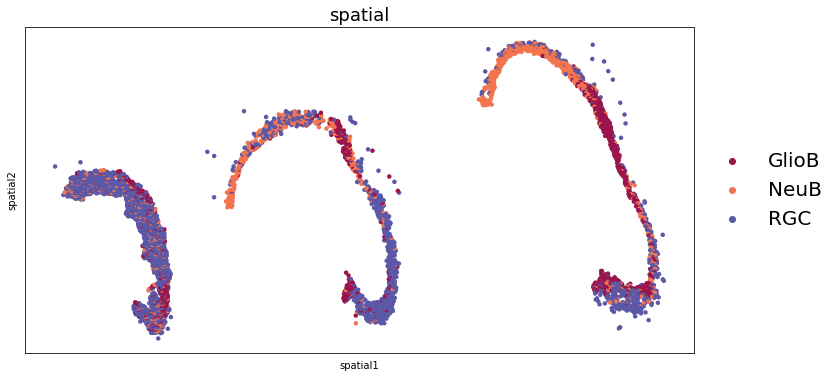

In [5]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(12, 6))
sc.pl.embedding(adata_all, basis='spatial', color='annotation', size=50, legend_loc='right margin', legend_fontsize=20,ax=axs, legend_fontoutline=3, show=False, s=80)
axs.set_title('spatial',fontsize=18)

## Calculate transfer matrix

In [6]:
pi12 = spt.transfer_matrix(adata1_sub,adata2_sub)
pi23 = spt.transfer_matrix(adata2_sub,adata3_sub)

Organize result in a structured format

In [7]:
pi_matrix_coord = spt.generate_animate_input(pi_list=[pi12,pi23],
                                                   adata_list=[adata1_sub,adata2_sub,adata3_sub],
                                                   time ='Time point',
                                                   annotation='annotation')
#pi_matrix_coord.to_csv("/hwfssz1/ST_SUPERCELLS/P21Z10200N0134/USER/huangke2/27.spatial.trajectory/00.data/test.csv")
pi_matrix_coord.to_csv("./cell.transfer.csv")

## Visualze cell transfer by dynamic figure

Animation of cell transferation

In [1]:
spt.animate_transfer(adata_list=[adata1_sub,adata2_sub,adata3_sub],
                 transfer_path='./cell.transfer.csv',
                 fig_title = " 'RGC' transfer from E12.5 E14.5 to E16.5",
                 time ='Time point',
                 annotation='annotation',
                 save_path='./cell.transfer.html',
                 times=['E12.5','E14.5','E16.5'])

![](../_static/more_time.gif)

## Visualize cell transfer by 3D figure

Preparation of input data

In [8]:
df_adata_1=adata1_sub.obs[['CellID','annotation','x','y']]
df_adata_1['batch']='slice1'
df_adata_2=adata2_sub.obs[['CellID','annotation','x','y']]
df_adata_2['batch']='slice2'
df_adata_3=adata3_sub.obs[['CellID','annotation','x','y']]
df_adata_3['batch']='slice3'
df_concat=pd.concat([df_adata_1,df_adata_2,df_adata_3])

df_mapping_cell=pi_matrix_coord[['slice1','slice2','slice3']]


Visualization 

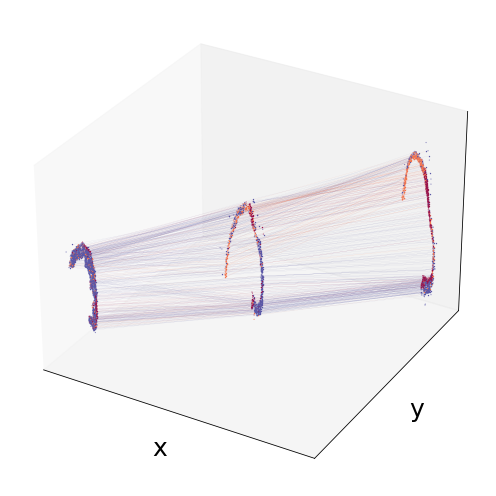

In [10]:
spt.Visual_3D_mapping_3(df_concat,df_mapping_cell,point_size=0.8,line_width=0.03,cell_color_list=['#9A154C', '#F3754E', '#5B58A7'])
